In [35]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
## Importing district demographic and financial data
data = pd.read_csv('C:/Users/viks9/OneDrive/Documents/espark_project.csv')
financials = pd.read_csv('C:/Users/viks9/OneDrive/Documents/financials.csv')
data = pd.merge(data, financials, on='Agency Name', how='left')
data = data.rename(columns= {'Total Current Expenditures - Salary (Z32) as Percentage of Curr El-Sec (TCURELSC) [District Finance] 2016-17': '% Salary'})

C:\Users\viks9\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns

Index(['Agency Name', 'State Name [District] Latest available year_x',
       'State Abbr [District] Latest available year',
       'Agency ID - NCES Assigned [District] Latest available year',
       'Supervisory Union (ID) Number [District] 2018-19',
       'Total Number Operational Schools [Public School] 2018-19',
       'Total Number of Public Schools [Public School] 2018-19',
       'County Name [District] 2018-19', 'Agency Type [District] 2018-19',
       'Urban-centric Locale [District] 2018-19',
       'Lowest Grade Offered [District] 2018-19',
       'Highest Grade Offered [District] 2018-19',
       'Total Students All Grades (Excludes AE) [District] 2018-19',
       'Full-Time Equivalent (FTE) Teachers [District] 2018-19',
       'Pupil/Teacher Ratio [District] 2018-19',
       'Limited English Proficient (LEP) / English Language Learners (ELL) [District] 2018-19',
       'Reduced-price Lunch Eligible Students [Public School] 2018-19',
       'Free and Reduced Lunch Student

In [4]:
## Dropping columns that are not needed
data = data.drop(columns = ['Agency ID - NCES Assigned [District] Latest available year',
                            'Supervisory Union (ID) Number [District] 2018-19',
                            'Location Address 2 [District] 2018-19',
                            'Location Address 3 [District] 2018-19',
                            'Mailing Address 2 [District] 2018-19',
                            'Mailing Address 3 [District] 2018-19',
                            'Limited English Proficient (LEP) / English Language Learners (ELL) [District] 2018-19',
                            'Reduced-price Lunch Eligible Students [Public School] 2018-19',
                            'State Name [District] Latest available year_y',
                            'Total General Revenue (TOTALREV) [District Finance] 2016-17',
                            'Total Expenditures (TOTALEXP) [District Finance] 2016-17',
                            'Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17',
                           ]
                )

In [37]:
## Only selecting schools that have schools in relevant grades (PreK-5th)
relevant_grades = ['Kindergarten', 'Prekindergarten','1st Grade', '4th Grade','5th Grade', '3rd Grade', '2nd Grade']
under_fifth = data[data['Lowest Grade Offered [District] 2018-19'].isin(relevant_grades)]

In [38]:
under_fifth.describe()

,Agency ID - NCES Assigned [District] Latest available year,Total Number Operational Schools [Public School] 2018-19,Total Number of Public Schools [Public School] 2018-19,Total Students All Grades (Excludes AE) [District] 2018-19,Full-Time Equivalent (FTE) Teachers [District] 2018-19,Pupil/Teacher Ratio [District] 2018-19,Limited English Proficient (LEP) / English Language Learners (ELL) [District] 2018-19,Reduced-price Lunch Eligible Students [Public School] 2018-19,Free and Reduced Lunch Students [Public School] 2018-19,Location ZIP [District] 2018-19,Mailing ZIP [District] 2018-19,Phone Number [District] 2018-19,Total General Revenue (TOTALREV) [District Finance] 2016-17,Total Expenditures (TOTALEXP) [District Finance] 2016-17,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17,% Salary
count,1.744000e+04,17440.000000,17192.000000,17383.000000,17412.000000,16833.000000,13334.000000,14370.000000,15560.000000,17440.000000,17440.000000,1.744000e+04,1.606700e+04,1.606700e+04,15923.000000,16056.000000
mean,2.885633e+06,6.032053,6.164030,3132.495024,196.089950,15.198162,396.756262,186.459499,1681.495823,52604.335952,52597.174713,5.875645e+09,4.520340e+07,4.526215e+07,15170.834076,54.622770
std,1.514184e+06,16.070147,16.308039,10909.886917,634.415389,45.617295,2098.053455,705.424598,7185.952536,28943.252320,28940.929914,2.300762e+09,1.592141e+08,1.585650e+08,11656.659532,11.166303
min,1.000020e+05,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1002.000000,1002.000000,2.012278e+09,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.730652e+06,1.000000,1.000000,326.000000,23.117500,11.770000,8.000000,15.000000,147.000000,29788.500000,29741.250000,4.062510e+09,5.108500e+06,5.037000e+06,10821.500000,51.500000
50%,2.928420e+06,3.000000,3.000000,854.000000,60.805000,14.200000,33.000000,49.000000,400.000000,55075.500000,55070.500000,6.036744e+09,1.350500e+07,1.320500e+07,13141.000000,56.300000
75%,4.015728e+06,5.000000,6.000000,2439.000000,159.740000,16.890000,152.000000,133.000000,1096.250000,75791.250000,75789.250000,8.012693e+09,3.788900e+07,3.738400e+07,17218.000000,60.300000
max,5.680254e+06,785.000000,785.000000,495255.000000,21981.260000,5207.690000,101827.000000,29604.000000,391289.000000,99929.000000,99929.000000,9.899842e+09,1.057872e+10,9.824700e+09,579870.000000,254.200000


In [42]:
## Deleting rows that have null values in rows that will be used for our analysis
under_fifth = under_fifth[under_fifth['Pupil/Teacher Ratio [District] 2018-19'].notna()]
under_fifth = under_fifth[under_fifth['Total Students All Grades (Excludes AE) [District] 2018-19'] > 0]
under_fifth = under_fifth[under_fifth['% Salary'].notna()]

In [43]:
## finding pupil/student upper limit
pupil_iqr = 17.06 - 11.84
pupil_upper_limit = (pupil_iqr * 1.5) + 17.06
pupil_lower_limit = 11.84 - (pupil_iqr * 1.5)
print(pupil_upper_limit)
print(pupil_lower_limit)

under_fifth = under_fifth[under_fifth['Pupil/Teacher Ratio [District] 2018-19'] <= 28]
under_fifth = under_fifth[under_fifth['Pupil/Teacher Ratio [District] 2018-19'] >= 4]

## only focusing on regulal public schools
under_fifth = under_fifth[under_fifth['Agency Type [District] 2018-19'] == '1-Regular local school district that is NOT a component of a supervisory union']

24.889999999999997
4.010000000000002


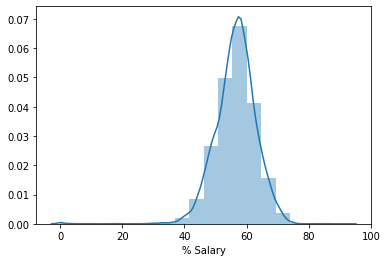

In [44]:
sns.distplot(under_fifth['% Salary'], bins = 20)

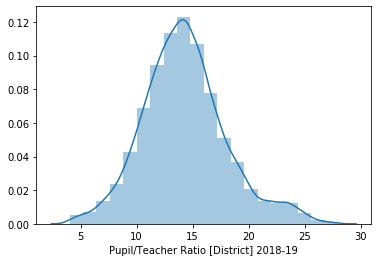

In [45]:
sns.distplot(under_fifth['Pupil/Teacher Ratio [District] 2018-19'], bins = 20)

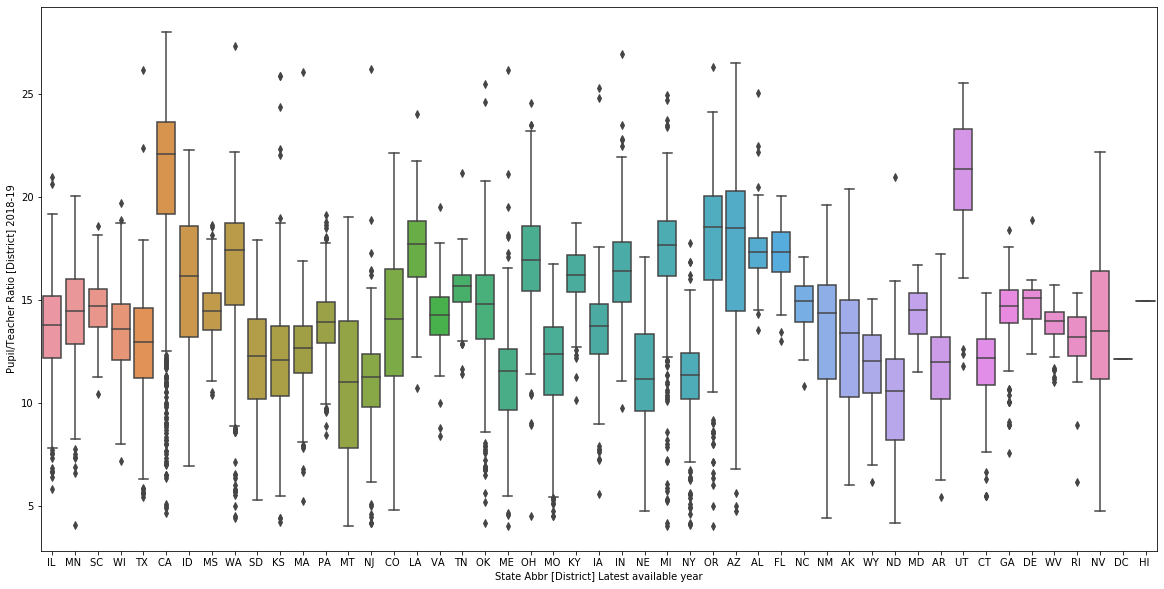

In [46]:
## Distribution of class size by state
plt.figure(figsize=(20,10))
sns.boxplot(x=under_fifth['State Abbr [District] Latest available year'], y=under_fifth['Pupil/Teacher Ratio [District] 2018-19'])

In [47]:
under_fifth.groupby('State Abbr [District] Latest available year')['Pupil/Teacher Ratio [District] 2018-19'].describe()

,count,mean,std,min,25%,50%,75%,max
State Abbr [District] Latest available year,,,,,,,,
AK,48.0,13.146042,3.145657,6.00,10.2775,13.380,14.9800,20.36
AL,217.0,17.356866,1.364958,13.52,16.5300,17.310,18.0000,25.05
AR,281.0,11.721423,2.339766,5.41,10.1500,11.960,13.1900,17.21
AZ,189.0,17.331905,4.329646,4.71,14.4400,18.490,20.2700,26.47
CA,916.0,20.699531,4.406301,4.63,19.1700,22.070,23.6200,28.00
CO,176.0,13.747614,3.561652,4.80,11.2675,14.045,16.5000,22.12
CT,243.0,11.774156,1.838944,5.48,10.8500,12.150,13.0700,15.34
DC,1.0,12.120000,NaN,12.12,12.1200,12.120,12.1200,12.12
DE,20.0,14.889000,1.346422,12.35,14.0700,15.085,15.4625,18.85


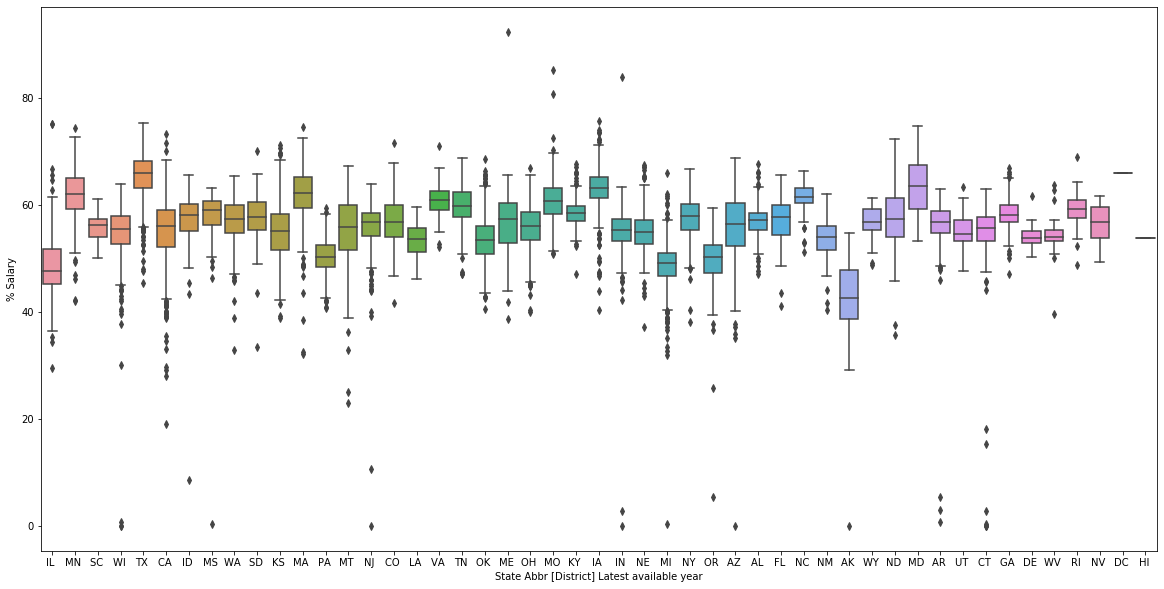

In [48]:
## Distribution of % of Expendatures spent on Salaries by state
plt.figure(figsize=(20,10))
sns.boxplot(x=under_fifth['State Abbr [District] Latest available year'], y=under_fifth['% Salary'])

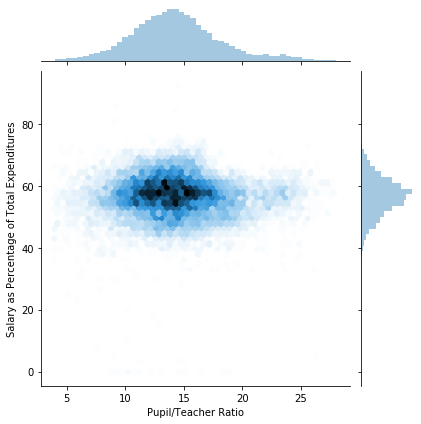

In [49]:
fig = sns.jointplot(under_fifth['Pupil/Teacher Ratio [District] 2018-19'], under_fifth['% Salary'], kind='hex' )
fig.set_axis_labels('Pupil/Teacher Ratio', 'Salary as Percentage of Total Expenditures')

In [50]:
## Identifying the 75% of Salary Expendatures by state
top_75_salary = pd.DataFrame(under_fifth.groupby('State Abbr [District] Latest available year')['% Salary'].describe()['75%'])

##Identifying the bottom 25% of pupil/teacher ratio by state
bottom_25_class_size = pd.DataFrame(under_fifth.groupby('State Abbr [District] Latest available year')['Pupil/Teacher Ratio [District] 2018-19'].describe()['25%'])

## Combining Data
limits = pd.merge(top_75_salary, bottom_25_class_size, on= 'State Abbr [District] Latest available year', how='left'  )
limits= limits.rename(columns={'75%': 'Top Percentile Salary', '25%':'Bottom Percentile Techer/Student'})
limits

,Top Percentile Salary,Bottom Percentile Techer/Student
State Abbr [District] Latest available year,,
AK,47.825,10.2775
AL,58.600,16.5300
AR,58.900,10.1500
AZ,60.400,14.4400
CA,59.100,19.1700
CO,60.050,11.2675
CT,57.800,10.8500
DC,66.100,12.1200
DE,55.125,14.0700


In [17]:
compare = pd.merge(under_fifth, limits, on='State Abbr [District] Latest available year', how='left')

In [18]:
## Excluding values that have a high pupil/teacher ratio's...not as much room to increase class sizes
first = compare[compare['Pupil/Teacher Ratio [District] 2018-19'] < compare['Bottom Percentile Techer/Student']]

In [51]:
## Excluding values that have a high % of Expendatures on Salary...room to decrease expenses
second = first[first['% Salary'] > first['Top Percentile Salary']]

In [52]:
non_rural = second[second['Urban-centric Locale [District] 2018-19'] != '42-Rural: Distant']
non_rural = non_rural[non_rural['Urban-centric Locale [District] 2018-19'] != '43-Rural: Remote']

In [53]:
leads = non_rural[['Agency Name','Web Site URL [District] 2018-19',
       'Mailing Address 1 [District] 2018-19',
       'Mailing City [District] 2018-19',
       'Mailing State Abbr [District] 2018-19',
       'Mailing ZIP [District] 2018-19',
       'Phone Number [District] 2018-19']]

In [54]:
## Leads Generated
leads

,Agency Name,Web Site URL [District] 2018-19,Mailing Address 1 [District] 2018-19,Mailing City [District] 2018-19,Mailing State Abbr [District] 2018-19,Mailing ZIP [District] 2018-19,Phone Number [District] 2018-19
142,ALFRED-ALMOND CENTRAL SCHOOL DISTRICT,http://www.aacs.wnyric.org,6795 RT 21,ALMOND,NY,14804,6072766500
226,AMADOR COUNTY OFFICE OF EDUCATION,http://www.amadorcoe.org/,217 Rex Ave.,Jackson,CA,95642,2092575353
353,ARCOHE UNION ELEMENTARY,http://www.arcohe.net,PO Box 93,Herald,CA,95638,2097482313
444,ATHENS CITY,http://www.athenscsd.org,25 S Plains Rd,The Plains,OH,45780,7407974544
465,ATTALLA CITY,http://www.attalla.k12.al.us,101 Case Ave,Attalla,AL,35954,2564597071
530,AVON BORO SCHOOL DISTRICT,http://WWW.AVONSCHOOL.COM,505 LINCOLN AVE,AVON,NJ,7717,7327754328
607,BANGOR SCHOOL DISTRICT,http://www.bangor.k12.wi.us,PO Box 99,Bangor,WI,54614,6084862331
681,BATTLE CREEK PUBLIC SCHOOLS,NaN,3 VAN BUREN ST W,BATTLE CREEK,MI,49017,2699659465
703,BAYPORT-BLUE POINT UNION FREE SCHOOL DISTRICT,http://www.bbpschools.org,189 ACADEMY ST,BAYPORT,NY,11705,6314727860
709,BEACHWOOD CITY,http://www.beachwoodschools.org/,24601 Fairmount Blvd,Beachwood,OH,44122,2164642600


In [34]:
## File to CSV to be uploaded into Salesforce
csv_data = leads.to_csv('C:/Users/viks9/OneDrive/Documents/espark_project_leads.csv')